In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram, circuit_drawer


In [2]:
#Create Quantum Circuit with 3 qubits
alice = QuantumCircuit(1, name = "Alice")
bob = QuantumCircuit(2, name = "Bob")
teleportation_circuit = QuantumCircuit(3, 3)

In [3]:
#Define the initial state to be teleported(Alice Qubit)
initial_state = [0.6, -0.8]

In [4]:
alice.initialize(initial_state, 0)

In [5]:
#Create entanglemetn betweet Alice's and Bob's qubit
teleportation_circuit.h(1)
teleportation_circuit.cx(1, 2)

In [6]:
# Perform a Bell measurement on Alice's qubit and the entangled qubit
teleportation_circuit.cx(0, 1)
teleportation_circuit.h(0)
teleportation_circuit.measure([0, 1], [0, 1])

In [7]:
# Apply corrections to Bob's qubit based on classical measurement outcomes
teleportation_circuit.z(2).c_if(0, 1) # If Alice's result is 1, apply Z gate
teleportation_circuit.x(2).c_if(0, 2) # If Alice's result is 2, apply X gate

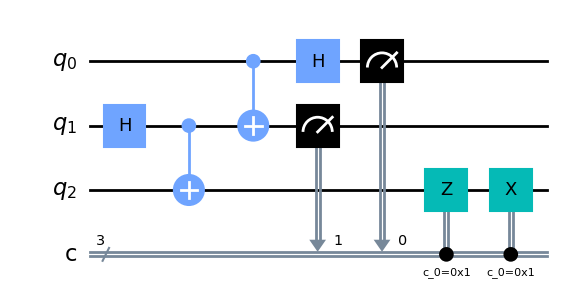

In [14]:
#Visualise circuit
# print(teleportation_circuit)
circuit_drawer(teleportation_circuit, output='mpl')

In [9]:
#Simulate the teleportation
backend = Aer.get_backend('qasm_simulator')
job = execute(teleportation_circuit, backend, shots=1024)
result = job.result()
counts = result.get_counts()

In [10]:
#print the counts
print ("Original Counts :", counts)

Original Counts : {'001': 258, '010': 270, '000': 250, '011': 246}


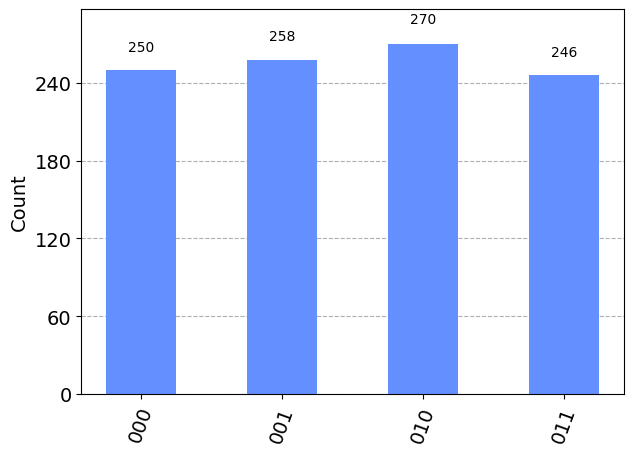

In [11]:
#Plot histogram
plot_histogram(counts)